In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import warnings
warnings.filterwarnings("ignore")

# Extract Red Entities from Image

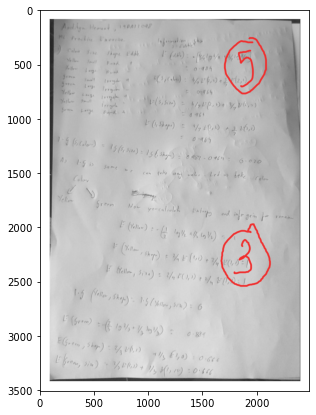

In [32]:
original_img = cv2.imread('0001.jpg')
img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,7))
plt.imshow(img)

In [33]:
t = 20 #threshold acceptance
red_thresh = cv2.inRange(img, np.array([123 - t, 57 - t, 57 - t]), np.array([220 + t, 57 + t, 57 + t]))

In [34]:
combined_mask = red_thresh
combined_mask_inv = 255 - combined_mask

In [35]:
combined_mask_rgb = cv2.cvtColor(combined_mask_inv, cv2.COLOR_GRAY2RGB)
img = cv2.max(img, combined_mask_rgb)

# Extract Circles from Image

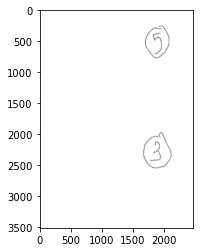

In [36]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
plt.imshow(img, cmap="gray")

In [7]:
#Mask to crop circles
height,width = img.shape
mask = np.zeros((height,width), np.uint8)

In [8]:
#Applying Hough Circle Transform
#Tried Canny Edge Detection, couldn't get it to work.
#img = cv2.Canny(img, 150, 200);
#plt.imshow(img, cmap="gray")
img = cv2.medianBlur(img,5)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,200,param1=100,param2=30,minRadius=100,maxRadius=250)

In [9]:
# To Idenitify Circles in the Image

for i in circles[0,:]:
    i[2]=i[2]+4
    # Draw on mask
    cv2.circle(mask,(i[0],i[1]),int(i[2]),(255,255,255),thickness=-1)

In [10]:
#to show masked images
masked_data = cv2.bitwise_and(img, img, mask=mask)

# Apply Threshold
_,thresh = cv2.threshold(mask,1,255,cv2.THRESH_BINARY)

# Find Contour
contours = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
crop = []
j = 0
for i in contours[0]:
    x,y,w,h = cv2.boundingRect(i)
    

# Crop masked_data
    crop.append(masked_data[y:y+h,x:x+w])

#Code to close Window
    cv2.imshow('Cropped Eye',crop[j])
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    j+=1

# Digit Recognition

In [11]:
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical

In [12]:
model1 = keras.models.load_model("digit")
model2 = keras.models.load_model("digit2")
model3 = keras.models.load_model("digit3")

In [14]:
grey = crop[0]
image = grey
size = len(grey)
for i in range(size):
    for j in range(size):
        if (grey[i][j]==0):
            grey[i][j] = 255

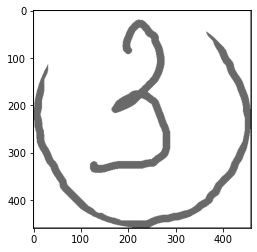




----------------Contoured Image--------------------


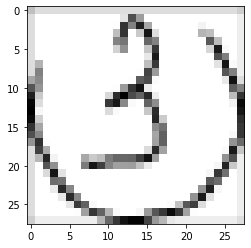

In [37]:
# ret, thresh = cv2.threshold(grey.copy(), 220, 255, cv2.THRESH_BINARY)
# #contours,_ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# preprocessed_digits = []
# x,y,w,h = cv2.boundingRect(grey)

# # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
# cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)

# # Cropping out the digit from the image corresponding to the current contours in the for loop
# digit = thresh[y:y+h, x:x+w]
plt.imshow(grey, cmap="gray")
plt.show()
resized_digit=cv2.equalizeHist(grey)
# Resizing that digit to (18, 18)
resized_digit =  imutils.resize(resized_digit, width=28, height=28)

# Adding the preprocessed digit to the list of preprocessed digits
preprocessed_digits.append(resized_digit)
    
print("\n\n\n----------------Contoured Image--------------------")
np.set_printoptions(threshold=np.inf)
plt.imshow(resized_digit, cmap="gray")
inp = np.array(preprocessed_digits)

In [16]:
resized_digit.shape

(28, 28)



---------------------------------------


=========PREDICTION============ 




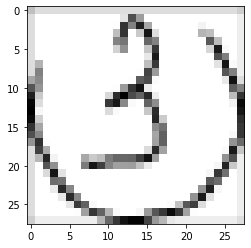



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0.09759753 0.02141205 0.15419048 0.1140264  0.0146084  0.0089328
  0.00492024 0.00463337 0.5763994  0.00327928]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




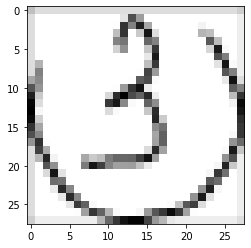



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0.09759753 0.02141205 0.15419048 0.1140264  0.0146084  0.0089328
  0.00492024 0.00463337 0.5763994  0.00327928]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------




In [38]:
for digit in preprocessed_digits:
    #digit2=cv2.equalizeHist(digit)
    digit2=digit
    prediction1 = model1.predict(digit2.reshape(1, 28, 28, 1))

    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit2.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction1)))

    
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction1))

    
    hard_maxed_prediction = np.zeros(prediction1.shape)
    hard_maxed_prediction[0][np.argmax(prediction1)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    print ("\n\n---------------------------------------\n\n")



---------------------------------------


=========PREDICTION============ 




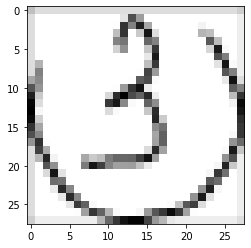



Final Output: 3

Prediction (Softmax) from the neural network:

 [[3.8048132e-05 6.7059495e-03 1.6756216e-02 6.2769490e-01 1.8051539e-03
  3.1933874e-01 2.4875189e-04 1.0964531e-02 1.3078038e-02 3.3696168e-03]]


In [21]:
for digit in preprocessed_digits:
    #digit2=cv2.equalizeHist(digit)
    digit2 = digit
    prediction1 = model3.predict(digit2.reshape(1, 28, 28, 1))

    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit2.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction1)))

    
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction1))

    
#     hard_maxed_prediction = np.zeros(prediction.shape)
#     hard_maxed_prediction[0][np.argmax(prediction)] = 1
#     print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
#     print ("\n\n---------------------------------------\n\n")